In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
#from imblearn.over_sampling import SMOTE
import os
import warnings
warnings.filterwarnings('ignore')

os.makedirs('models', exist_ok=True)

print("DATA PREPROCESSING")
print("="*60)

#load data
print("Step 1: Loading Dataset")
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn (1).csv')

print(f"Original shape: {df.shape}")
print(f"\nRows: {df.shape[0]}, Columns: {df.shape[1]}")
print(df.head())

DATA PREPROCESSING
Step 1: Loading Dataset
Original shape: (7043, 21)

Rows: 7043, Columns: 21
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic         

Step 2: Handling Missing Values
Initial missing values check:
Series([], dtype: int64)

Empty strings in TotalCharges: 0
After conversion - Missing values in TotalCharges: 0
Missing values imputed with median: 1397.47
Remaining missing values: 0
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


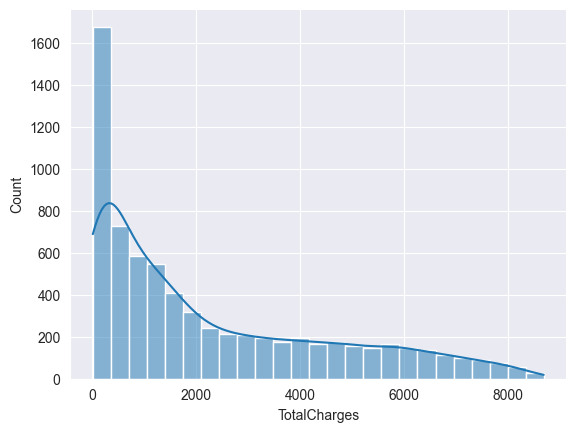

In [9]:
#handling missing values
print("Step 2: Handling Missing Values")
print("="*60)

#check missing values
print("Initial missing values check:")
print(df.isnull().sum()[df.isnull().sum()>0])

#total charges contains empty strings
print(f"\nEmpty strings in TotalCharges: {(df['TotalCharges'] ==' ').sum()}")

#convert Total charges to numeric
df['TotalCharges'] = df['TotalCharges'].replace(" ",np.nan)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

print(f"After conversion - Missing values in TotalCharges: {df['TotalCharges'].isnull().sum()}")

sns.histplot(x=df.TotalCharges , kde=True ) #kde = a line above the graph.

#impute with median
median_total_charges = df['TotalCharges'].median()
df['TotalCharges'] =df['TotalCharges'].fillna(median_total_charges)

print(f"Missing values imputed with median: {median_total_charges:.2f}")
print(f"Remaining missing values: {df.isnull().sum().sum()}")

# Verify no missing values remain
print(df.isnull().sum())
assert df.isnull().sum().sum() == 0, "Missing values still available!"


In [10]:
#remove duplicates
print("Step 3: Removing Duplicate Rows")

rows = df.shape[0]
duplicate_count = df.duplicated().sum()

df=df.drop_duplicates()

print(f"Duplicate rows found: {duplicate_count}")
print(f"Rows before: {rows}")
print(f"Rows after: {df.shape[0]}")


Step 3: Removing Duplicate Rows
Duplicate rows found: 0
Rows before: 7043
Rows after: 7043
